In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [17]:
data=pd.read_csv("Material Compressive Strength Experimental Data.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [5]:
data.isnull().sum()

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

In [6]:
data.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             6030.000000             6030.000000         6030.000000   
mean               383.642297              196.699846          111.856252   
std                149.994316              133.329220           74.241117   
min                124.440000                0.000000            0.000000   
25%                256.030000               78.210000           44.582500   
50%                377.405000              192.320000          115.250000   
75%                511.522500              307.650000          174.257500   
max                658.800000              438.470000          244.120000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     6030.000000       6030.000000          6030.000000   
mean       224.296955         17.651085           998.669332   
std         41.545751         11.687965            97.732677   
min        148.600000          0.000000           821.540000   
25%        190.387500          7.922500           918.437500   
50%        225.700000         16.345000           997.985000   
75%        257.447500         27.667500          1079.827500   
max        301.340000         39.280000          1174.360000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         6030.000000                 6030.000000   
mean           811.832398                  174.408504   
std            112.813539                  112.415173   
min            609.230000                   16.250000   
25%            717.447500                   70.300000   
50%            810.260000                  163.105000   
75%            905.857500                  272.602500   
max           1018.050000                  380.250000   

       Compression Strength MPa  
count               6139.000000  
mean                  56.851430  
std                   16.124932  
min                    2.610000  
25%                   47.085000  
50%                   59.790000  
75%                   69.845000  
max                   92.510000

CHECK THE DISTRIBUTION

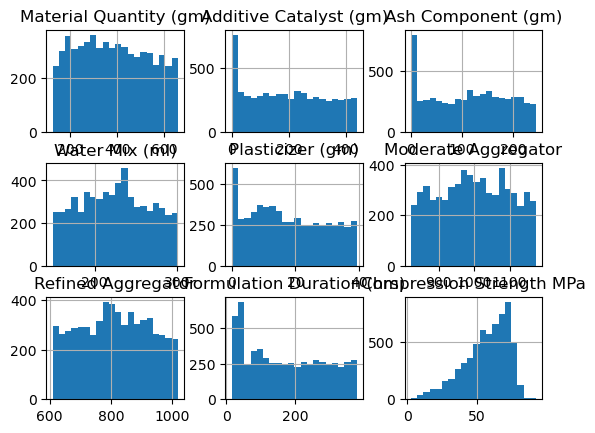

In [7]:
data.hist(bins=20)
plt.show()


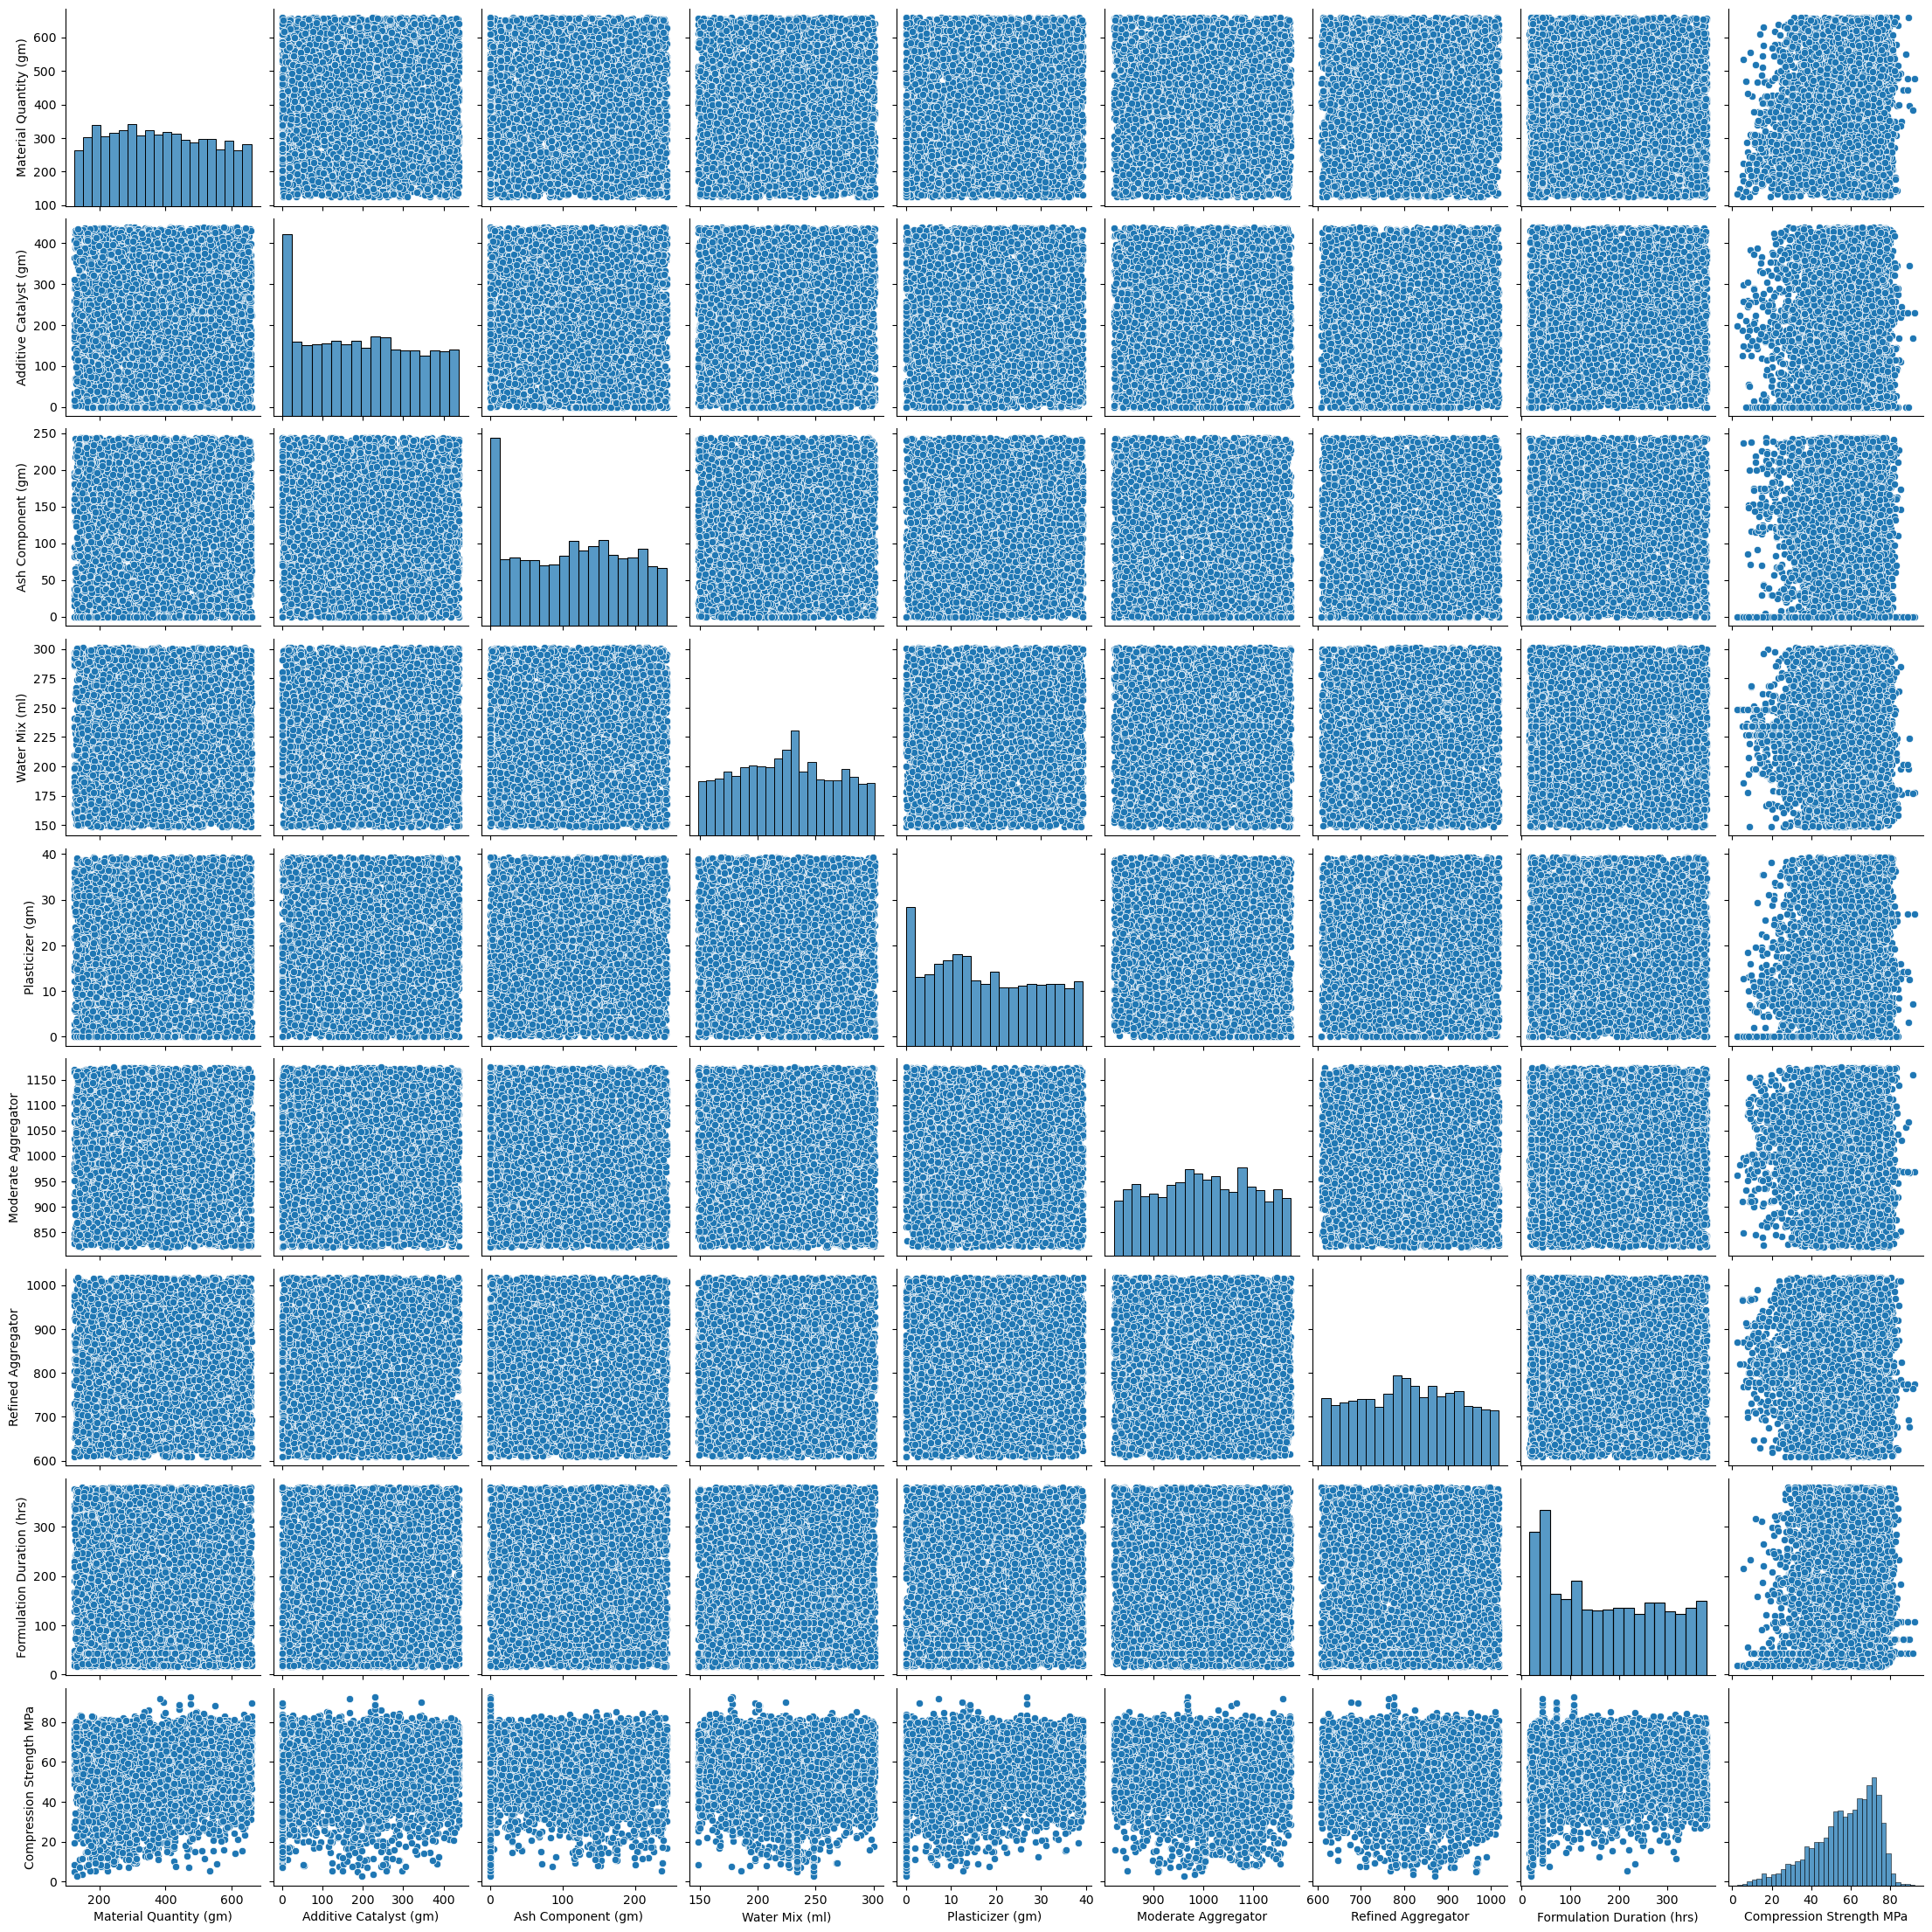

In [8]:
sns.pairplot(data)

['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)', 'Compression Strength MPa']


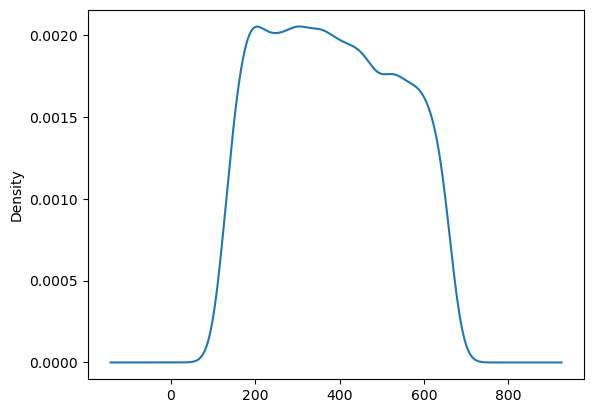

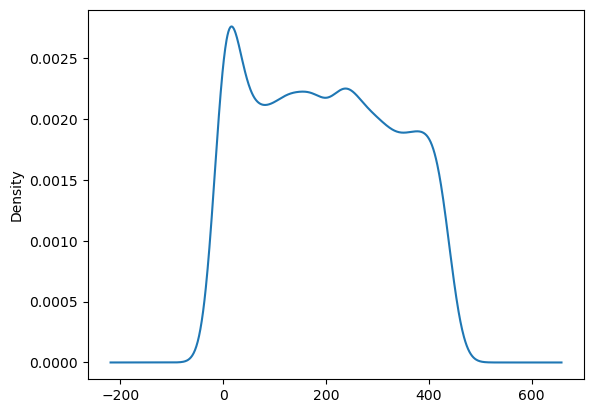

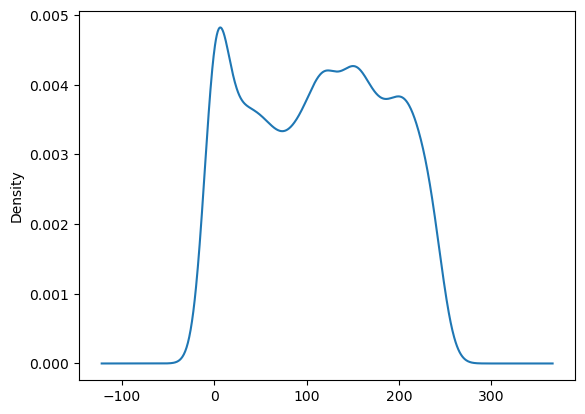

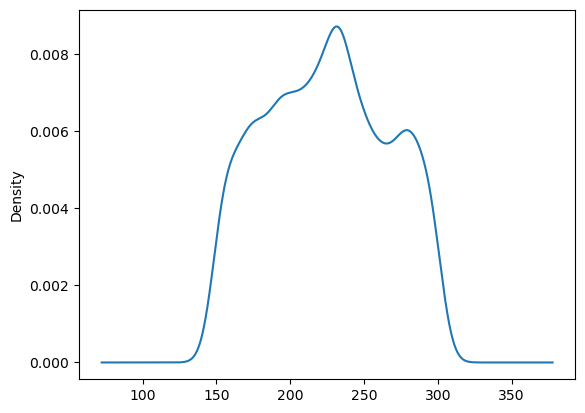

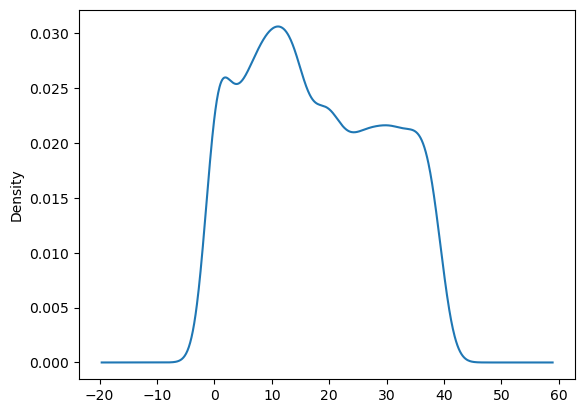

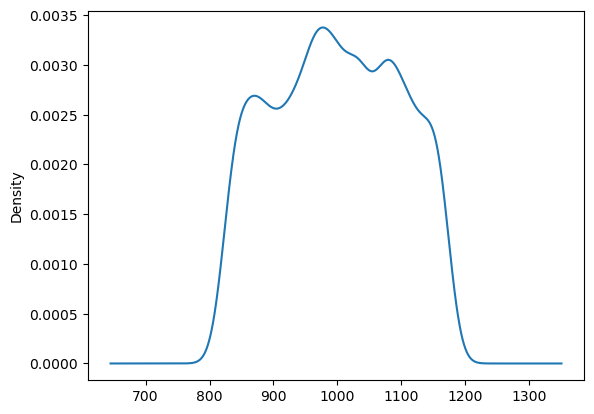

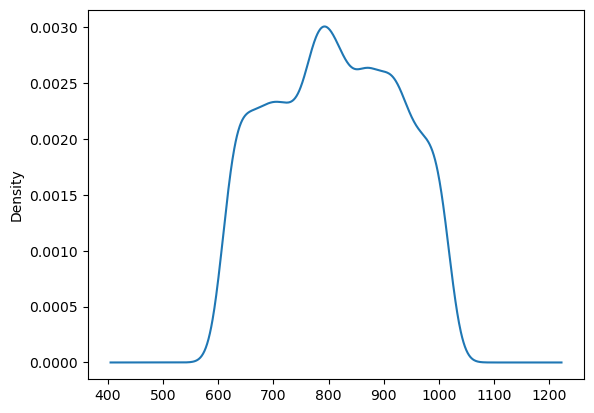

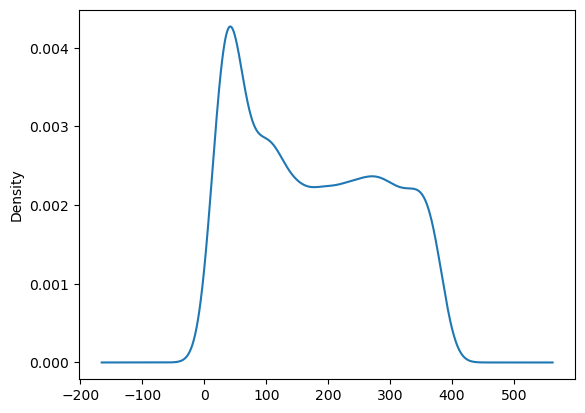

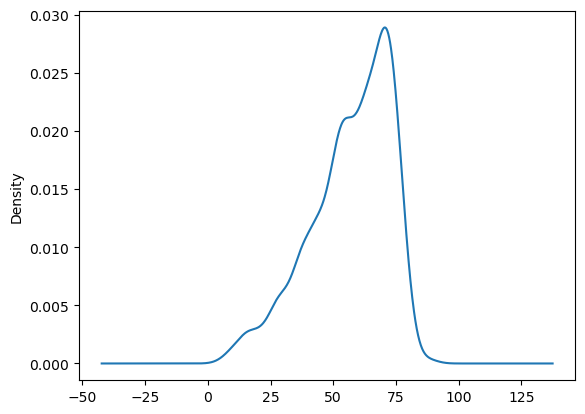

In [4]:
#with null values
li=list(data.columns)
print(li)
for i in (li):
    data[i].plot(kind="kde",xlabel=i)
    plt.show(i)


Compairing histogram and frequency distribution we found non of the column follow normal distribution

# remove the null values and fill them with mean

In [14]:
li=list(data.columns)
data1=data.copy()
for i in li:
    data1[i]=data[i].fillna(data[i].mean())
#     print(data1[i].isnull().sum())
# we will use data1 dateset in our model

NameError: name 'data' is not defined

In [7]:
print(data.isnull().sum())
print(data1.isnull().sum())

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64
Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64


In [15]:
# data1["Material Quantity (gm)"].isnull().sum()

In [16]:
#after repacing null value with mean
data1.describe() 

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             6139.000000             6139.000000         6139.000000   
mean               383.642297              196.699846          111.856252   
std                148.656533              132.140072           73.578969   
min                124.440000                0.000000            0.000000   
25%                258.490000               80.985000           45.900000   
50%                381.860000              196.420000          113.330000   
75%                509.785000              305.465000          172.765000   
max                658.800000              438.470000          244.120000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     6139.000000       6139.000000          6139.000000   
mean       224.296955         17.651085           998.669332   
std         41.175209         11.583722            96.861010   
min        148.600000          0.000000           821.540000   
25%        191.295000          8.025000           919.925000   
50%        224.296955         16.770000           998.669332   
75%        256.660000         27.430000          1078.680000   
max        301.340000         39.280000          1174.360000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         6139.000000                 6139.000000   
mean           811.832398                  174.408504   
std            111.807368                  111.412555   
min            609.230000                   16.250000   
25%            719.940000                   71.250000   
50%            811.832398                  167.360000   
75%            903.540000                  270.575000   
max           1018.050000                  380.250000   

       Compression Strength MPa  
count               6139.000000  
mean                  56.851430  
std                   16.124932  
min                    2.610000  
25%                   47.085000  
50%                   59.790000  
75%                   69.845000  
max                   92.510000

In [17]:
data.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             6030.000000             6030.000000         6030.000000   
mean               383.642297              196.699846          111.856252   
std                149.994316              133.329220           74.241117   
min                124.440000                0.000000            0.000000   
25%                256.030000               78.210000           44.582500   
50%                377.405000              192.320000          115.250000   
75%                511.522500              307.650000          174.257500   
max                658.800000              438.470000          244.120000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     6030.000000       6030.000000          6030.000000   
mean       224.296955         17.651085           998.669332   
std         41.545751         11.687965            97.732677   
min        148.600000          0.000000           821.540000   
25%        190.387500          7.922500           918.437500   
50%        225.700000         16.345000           997.985000   
75%        257.447500         27.667500          1079.827500   
max        301.340000         39.280000          1174.360000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         6030.000000                 6030.000000   
mean           811.832398                  174.408504   
std            112.813539                  112.415173   
min            609.230000                   16.250000   
25%            717.447500                   70.300000   
50%            810.260000                  163.105000   
75%            905.857500                  272.602500   
max           1018.050000                  380.250000   

       Compression Strength MPa  
count               6139.000000  
mean                  56.851430  
std                   16.124932  
min                    2.610000  
25%                   47.085000  
50%                   59.790000  
75%                   69.845000  
max                   92.510000

# Exploratry data analysis

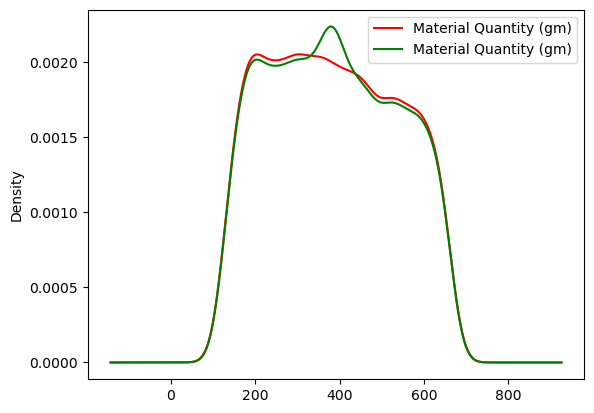

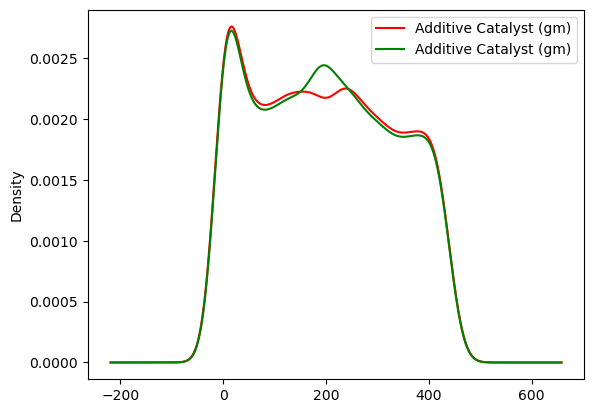

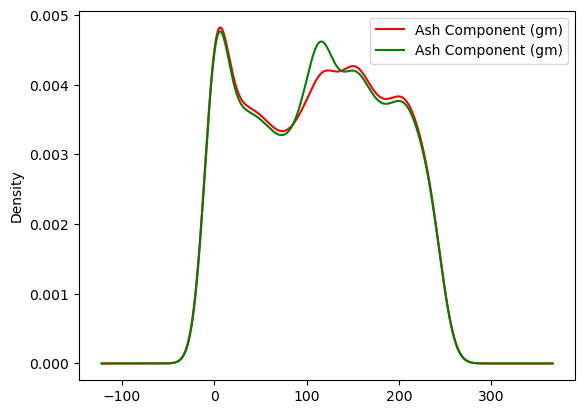

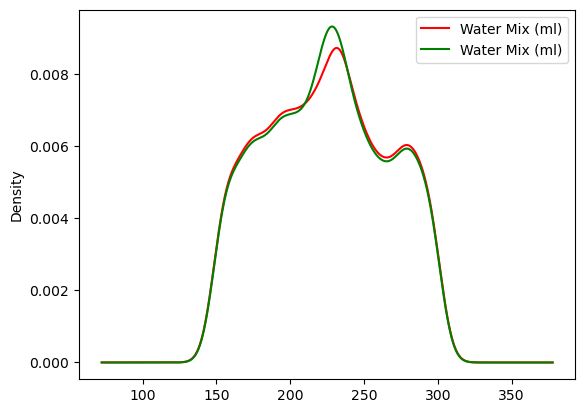

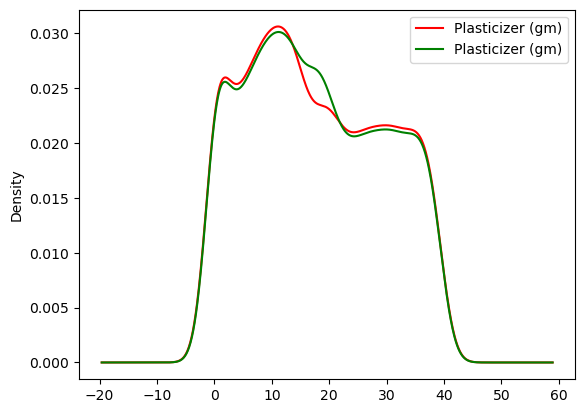

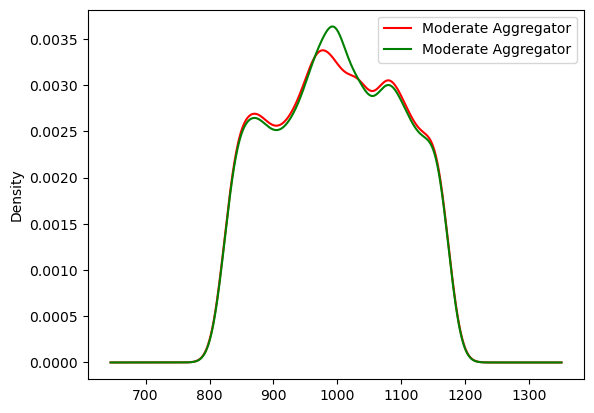

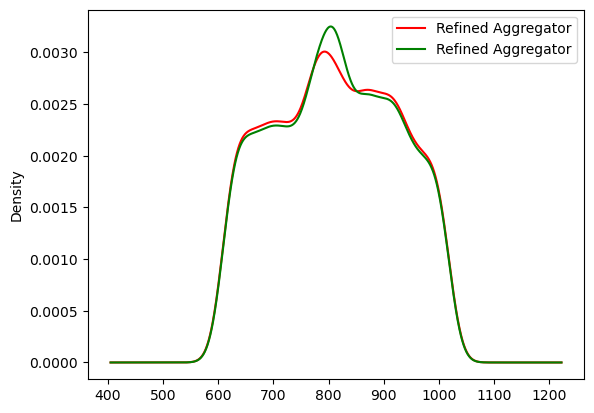

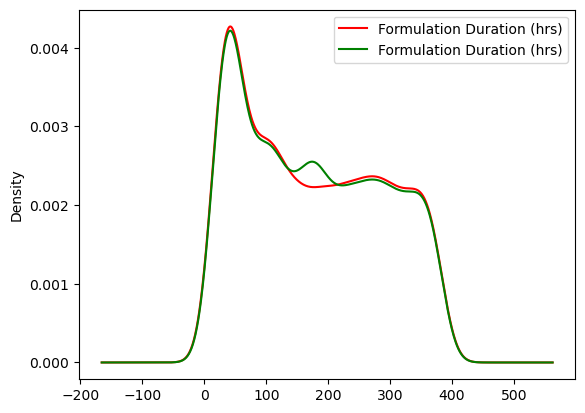

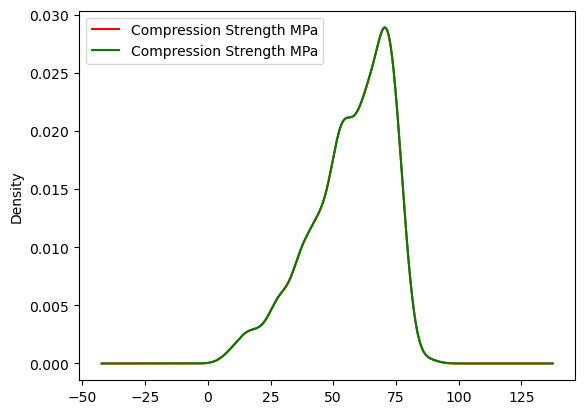

In [18]:
#add to subplot
for i in li:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    data[i].plot(kind="kde",color="red",ax=ax)
    data1[i].plot(kind="kde",color="green",ax=ax)
    lines,labels= ax.get_legend_handles_labels()
#     lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc="best")
    plt.show(i)

red line show dataset having null value
green line show dataset without null value
The data is not distorted ,distribution is almost similar. so we can use mean for null value fillup

# observation after null value fillup


1)standard deviation are almost same before null value fillup

2)mean,max,min unchanged

3)After removing null value we get the same distribution distribution does not distorted a lot. so mean  is a suitable parameter to fill the null values.


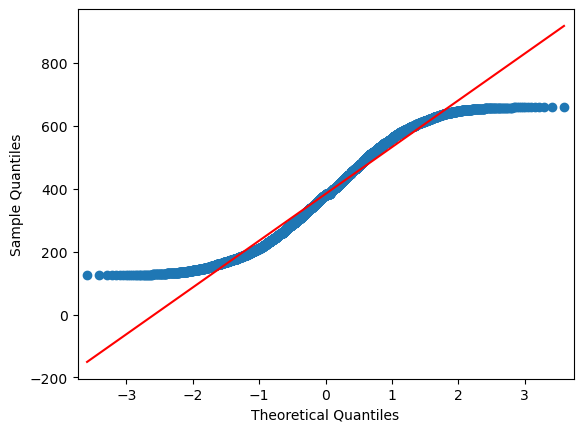

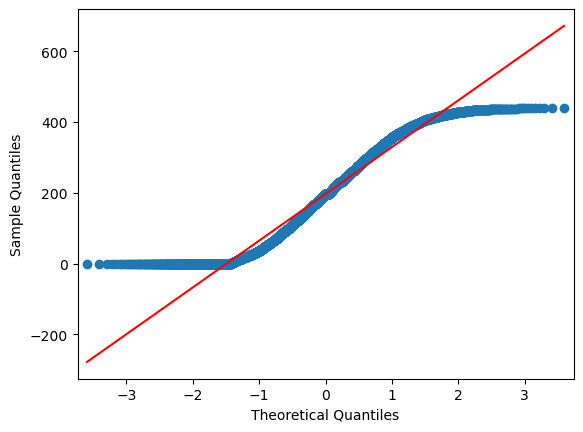

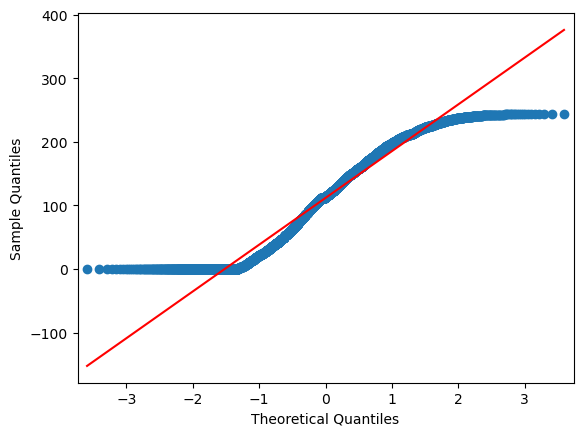

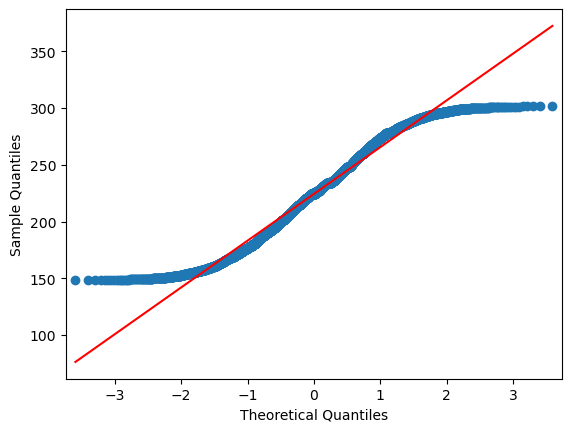

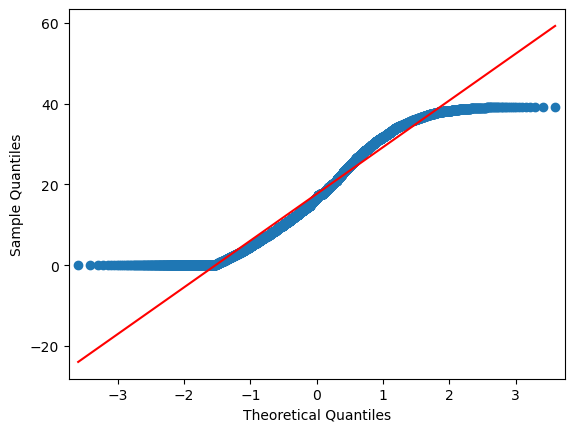

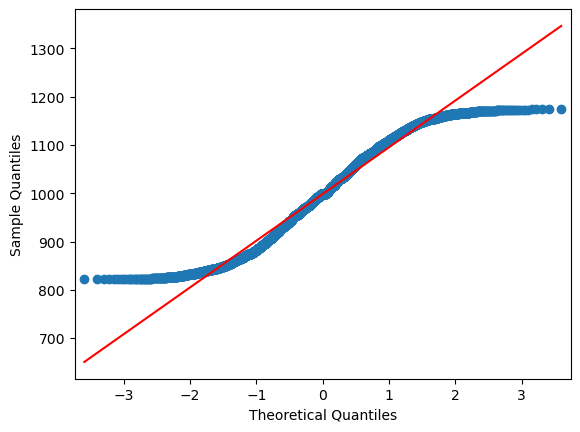

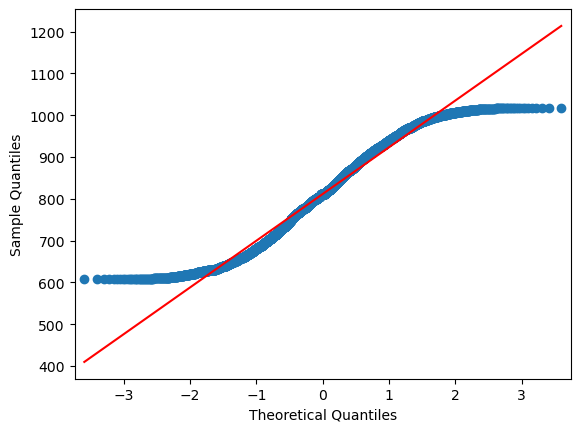

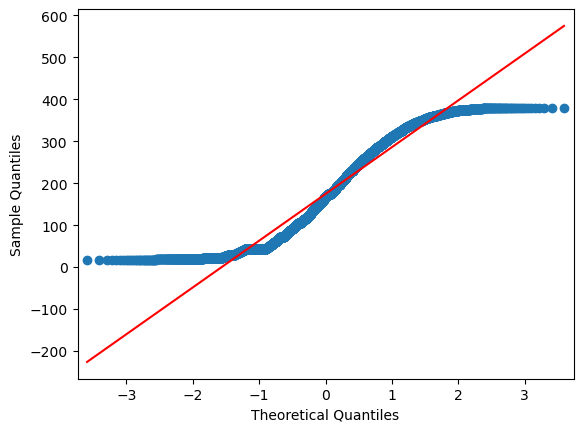

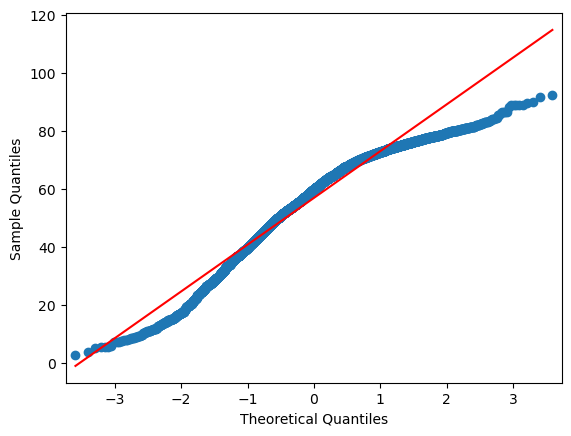

In [19]:
from statsmodels.graphics.gofplots import qqplot
for i in data1.columns:
    qqplot(data1[i] ,line='s')
    plt.show()

In [8]:
# data1=data.copy()
# data1=data.fillna(data.mean())
data1.skew()#The skewness does not tell us about the number of outliers. It only tells us the direction.

Material Quantity (gm)        0.096605
Additive Catalyst (gm)        0.107584
Ash Component (gm)           -0.001224
Water Mix (ml)                0.024953
Plasticizer (gm)              0.182842
Moderate Aggregator          -0.020582
Refined Aggregator           -0.006749
Formulation Duration (hrs)    0.233290
Compression Strength MPa     -0.766954
dtype: float64

In [14]:
data1.kurt()
#-ve kurtosis tells  that the distribution has lighter tail then normal distribution

Material Quantity (gm)       -1.107383
Additive Catalyst (gm)       -1.164703
Ash Component (gm)           -1.188991
Water Mix (ml)               -0.997349
Plasticizer (gm)             -1.126311
Moderate Aggregator          -1.061457
Refined Aggregator           -1.037800
Formulation Duration (hrs)   -1.240005
Compression Strength MPa      0.040721
dtype: float64

# check for outliers
box plot show no outliers are present in any feature exclude "Compression Strength MPa"

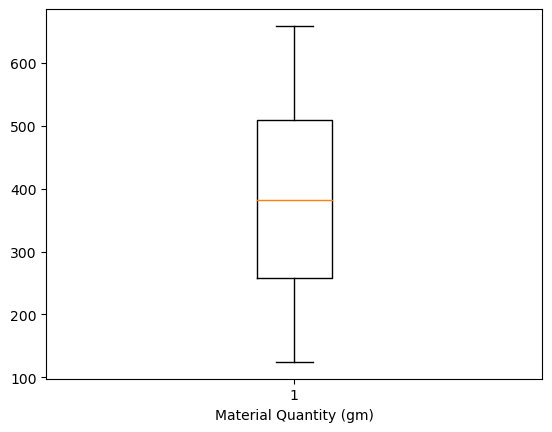

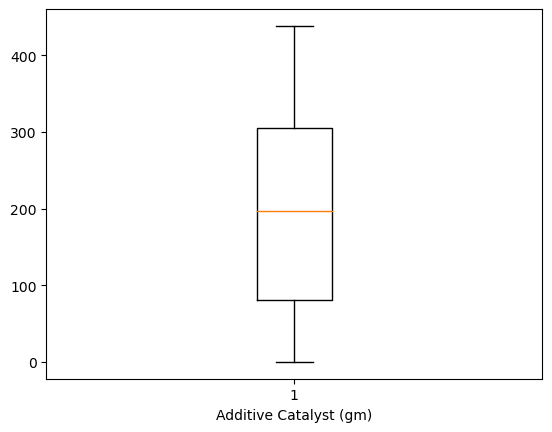

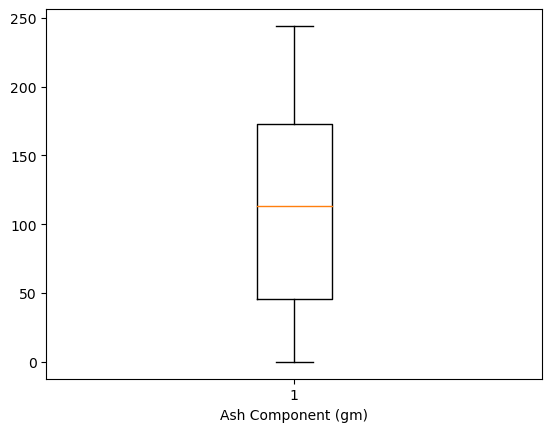

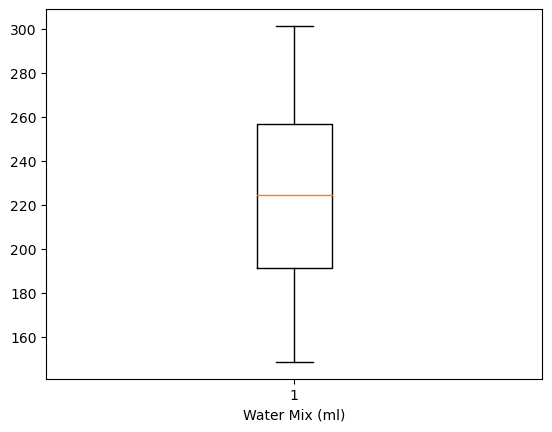

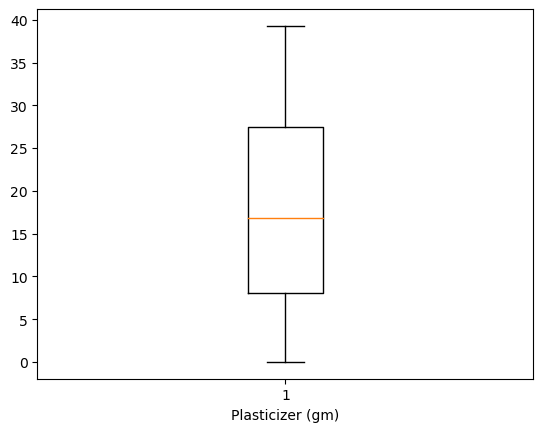

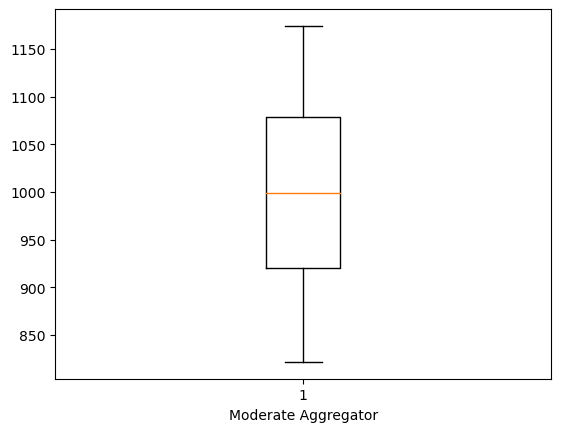

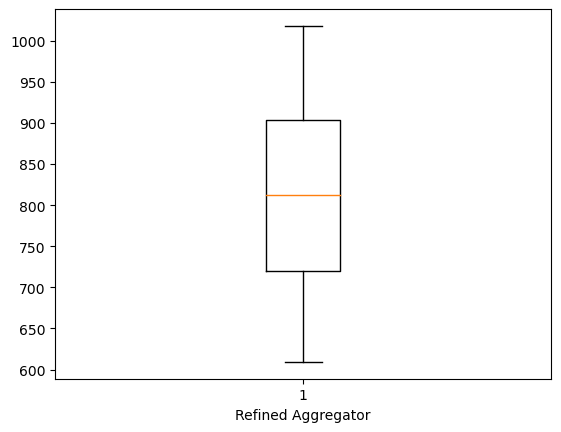

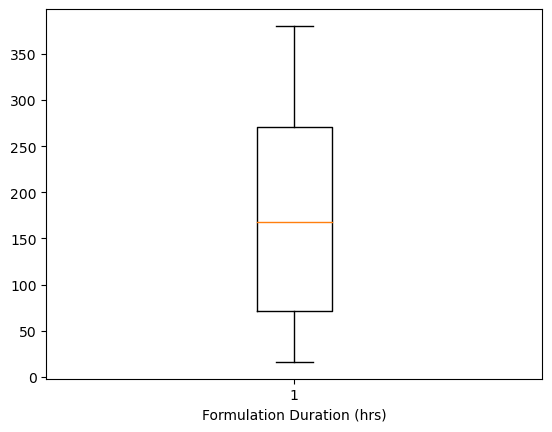

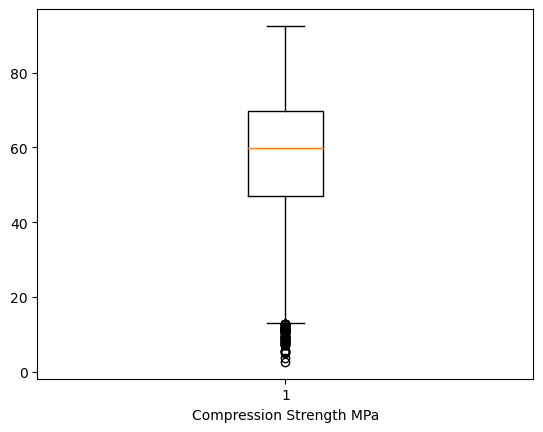

In [15]:
for i in data1.columns:  
    plt.boxplot(data1[i])
    plt.xlabel(i)
    plt.show() 
# data1    
# for i in data1.columns: 
#     print(data1[i])

In [16]:
data.loc[(data["Compression Strength MPa"]<12)]
# data.loc[(data["Compression Strength MPa"]<12)].shape

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
34                    172.39                  258.64                0.00   
81                    193.74                  290.60                0.00   
106                   206.06                   51.48              151.65   
210                   211.06                  141.52                0.00   
214                   554.30                  383.29               71.58   
354                   191.54                  287.92                0.00   
442                   177.39                    0.00              218.26   
880                   132.13                  198.13                0.00   
913                   534.29                  297.44              236.79   
1085                  290.48                    0.00                0.00   
1201                  232.17                    0.00              152.74   
1383                  203.50                  305.24                0.00   
1843                  305.00                    0.00              116.75   
1862                  224.36                  149.57                0.00   
2095                  285.24                    0.00              115.41   
2217                  248.27                  372.47                0.00   
2277                  124.44                  186.66                0.00   
2362                  287.92                    0.00                0.00   
2390                  193.25                    0.00              237.78   
2444                  227.16                  151.40                0.00   
2936                  425.78                    0.00                0.00   
2969                  141.52                  211.06                0.00   
3178                  431.36                  260.82               85.76   
3349                  222.04                   55.14              148.84   
3448                  162.26                  244.00                0.00   
3478                  176.90                    0.00              218.38   
3698                  186.66                  124.44                0.00   
3793                  188.86                    0.00              174.22   
3886                  124.44                  186.66                0.00   
3926                  149.57                  224.36                0.00   
3977                  378.20                    0.00                0.00   
4036                  132.13                  198.13                0.00   
4056                  192.76                    0.00              237.90   
4087                  311.10                    0.00                0.00   
4221                  170.31                  255.47                0.00   
4348                  189.10                    0.00              174.46   
4367                  309.88                    0.00                0.00   
4427                  246.44                   13.42              172.02   
4583                  305.24                  203.50                0.00   
4723                  141.52                  211.06                0.00   
4905                  204.96                   51.36              199.84   
4935                  172.39                  258.64                0.00   
4995                  280.60                    0.00              144.33   
5231                  258.64                  172.39                0.00   
5362                  244.00                    0.00                0.00   
5377                  469.70                    0.00                0.00   
5398                  149.57                  224.36                0.00   
5549                  287.92                    0.00                0.00   
5703                  311.10                    0.00                0.00   
5750                  186.66                  124.44                0.00   
5869                  242.29                  161.53                0.00   
5886                  165.55                  248.27  

# 2)Bivariant analysis

from corelation table it is  observed that features are not much corelated to each other

In [15]:
data1.corr()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000                0.009507   
Additive Catalyst (gm)                    0.009507                1.000000   
Ash Component (gm)                       -0.024180                0.053598   
Water Mix (ml)                            0.004640                0.029818   
Plasticizer (gm)                          0.048551                0.140246   
Moderate Aggregator                      -0.009366               -0.022772   
Refined Aggregator                       -0.016475                0.009807   
Formulation Duration (hrs)                0.066251                0.162214   
Compression Strength MPa                  0.130075                0.179706   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.024180        0.004640   
Additive Catalyst (gm)                0.053598        0.029818   
Ash Component (gm)                    1.000000       -0.006846   
Water Mix (ml)                       -0.006846        1.000000   
Plasticizer (gm)                      0.161667       -0.024760   
Moderate Aggregator                  -0.003301       -0.029820   
Refined Aggregator                    0.040000       -0.054666   
Formulation Duration (hrs)            0.109820        0.031210   
Compression Strength MPa              0.090405       -0.026886   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.048551            -0.009366   
Additive Catalyst (gm)              0.140246            -0.022772   
Ash Component (gm)                  0.161667            -0.003301   
Water Mix (ml)                     -0.024760            -0.029820   
Plasticizer (gm)                    1.000000            -0.020225   
Moderate Aggregator                -0.020225             1.000000   
Refined Aggregator                  0.056807            -0.006605   
Formulation Duration (hrs)          0.156834             0.008240   
Compression Strength MPa            0.205990            -0.031954   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.016475                    0.066251   
Additive Catalyst (gm)                0.009807                    0.162214   
Ash Component (gm)                    0.040000                    0.109820   
Water Mix (ml)                       -0.054666                    0.031210   
Plasticizer (gm)                      0.056807                    0.156834   
Moderate Aggregator                  -0.006605                    0.008240   
Refined Aggregator                    1.000000                    0.006408   
Formulation Duration (hrs)            0.006408                    1.000000   
Compression Strength MPa             -0.010696                    0.266394   

                            Compression Strength MPa  
Material Quantity (gm)                      0.130075  
Additive Catalyst (gm)                      0.179706  
Ash Component (gm)                          0.090405  
Water Mix (ml)                             -0.026886  
Plasticizer (gm)                            0.205990  
Moderate Aggregator                        -0.031954  
Refined Aggregator                         -0.010696  
Formulation Duration (hrs)                  0.266394  
Compression Strength MPa                    1.000000

In [16]:
data1.cov()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                22098.764897              186.743219   
Additive Catalyst (gm)                  186.743219            17460.998628   
Ash Component (gm)                     -264.480004              521.115556   
Water Mix (ml)                           28.400112              162.234414   
Plasticizer (gm)                         83.604514              214.670657   
Moderate Aggregator                    -134.865338             -291.457581   
Refined Aggregator                     -273.837462              144.893429   
Formulation Duration (hrs)             1097.267977             2388.120016   
Compression Strength MPa                311.800429              382.908468   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)             -264.480004       28.400112   
Additive Catalyst (gm)              521.115556      162.234414   
Ash Component (gm)                 5413.864677      -20.741092   
Water Mix (ml)                      -20.741092     1695.397866   
Plasticizer (gm)                    137.791386      -11.809382   
Moderate Aggregator                 -23.522660     -118.929734   
Refined Aggregator                  329.066730     -251.666730   
Formulation Duration (hrs)          900.261265      143.175060   
Compression Strength MPa            107.261636      -17.851002   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)             83.604514          -134.865338   
Additive Catalyst (gm)            214.670657          -291.457581   
Ash Component (gm)                137.791386           -23.522660   
Water Mix (ml)                    -11.809382          -118.929734   
Plasticizer (gm)                  134.182609           -22.692416   
Moderate Aggregator               -22.692416          9382.055338   
Refined Aggregator                 73.572967           -71.528610   
Formulation Duration (hrs)        202.406212            88.917430   
Compression Strength MPa           38.476238           -49.908884   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)             -273.837462                 1097.267977   
Additive Catalyst (gm)              144.893429                 2388.120016   
Ash Component (gm)                  329.066730                  900.261265   
Water Mix (ml)                     -251.666730                  143.175060   
Plasticizer (gm)                     73.572967                  202.406212   
Moderate Aggregator                 -71.528610                   88.917430   
Refined Aggregator                12500.887561                   79.821654   
Formulation Duration (hrs)           79.821654                12412.757337   
Compression Strength MPa            -19.283909                  478.582795   

                            Compression Strength MPa  
Material Quantity (gm)                    311.800429  
Additive Catalyst (gm)                    382.908468  
Ash Component (gm)                        107.261636  
Water Mix (ml)                            -17.851002  
Plasticizer (gm)                           38.476238  
Moderate Aggregator                       -49.908884  
Refined Aggregator                        -19.283909  
Formulation Duration (hrs)                478.582795  
Compression Strength MPa                  260.013420

high covariance show strong relation between the variable

<AxesSubplot:>

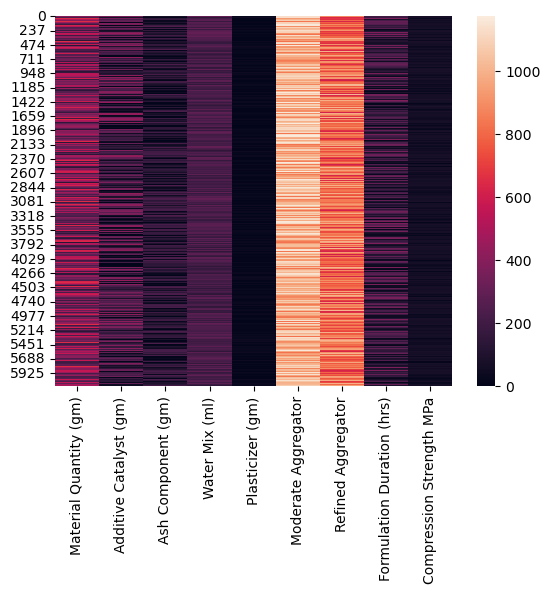

In [19]:
import seaborn as sns
sns.heatmap(data1)

# Feature engineering

In [13]:
inp=data1.drop("Compression Strength MPa",axis=1)
out=data1["Compression Strength MPa"]

NameError: name 'data1' is not defined

In [10]:
inp.var()

Material Quantity (gm)        22098.764897
Additive Catalyst (gm)        17460.998628
Ash Component (gm)             5413.864677
Water Mix (ml)                 1695.397866
Plasticizer (gm)                134.182609
Moderate Aggregator            9382.055338
Refined Aggregator            12500.887561
Formulation Duration (hrs)    12412.757337
dtype: float64

In [11]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(100)
vt.fit(inp)

VarianceThreshold(threshold=100)

In [20]:
data1.var()

Material Quantity (gm)        22098.764897
Additive Catalyst (gm)        17460.998628
Ash Component (gm)             5413.864677
Water Mix (ml)                 1695.397866
Plasticizer (gm)                134.182609
Moderate Aggregator            9382.055338
Refined Aggregator            12500.887561
Formulation Duration (hrs)    12412.757337
Compression Strength MPa        260.013420
dtype: float64

In [21]:
std=np.var(inp)
std

Material Quantity (gm)        22095.165164
Additive Catalyst (gm)        17458.154354
Ash Component (gm)             5412.982796
Water Mix (ml)                 1695.121698
Plasticizer (gm)                134.160752
Moderate Aggregator            9380.527067
Refined Aggregator            12498.851254
Formulation Duration (hrs)    12410.735386
dtype: float64

In [25]:
 inp.columns[vt.get_support()==False]

Index([], dtype='object')

In [26]:
vt.get_params(deep=True)

{'threshold': 100}

In [27]:
vt.get_feature_names_out()

array(['Material Quantity (gm)', 'Additive Catalyst (gm)',
       'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)',
       'Moderate Aggregator', 'Refined Aggregator',
       'Formulation Duration (hrs)'], dtype=object)

In [28]:
 inp.columns[vt.get_support()==False]

Index([], dtype='object')

In [29]:
 vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [30]:
inp.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
dtype: int64

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
skb=SelectKBest(r_regression,k=5).fit_transform(inp,out)
skb

array([[486.42, 180.6 ,  21.26,  16.11, 344.43],
       [133.32, 260.14, 185.6 ,   6.27,  28.86],
       [559.97,   2.84, 111.76,  11.95, 237.68],
       ...,
       [358.29,  22.7 ,  17.99,  34.91, 302.76],
       [445.25, 275.59, 178.86,  18.07, 374.63],
       [560.23, 266.56, 167.14,  10.63, 360.96]])

# Conclusion all columns having variance threshold less than 100 will be removed


In [32]:
corr_=inp.corr()
corr_

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000                0.009507   
Additive Catalyst (gm)                    0.009507                1.000000   
Ash Component (gm)                       -0.024180                0.053598   
Water Mix (ml)                            0.004640                0.029818   
Plasticizer (gm)                          0.048551                0.140246   
Moderate Aggregator                      -0.009366               -0.022772   
Refined Aggregator                       -0.016475                0.009807   
Formulation Duration (hrs)                0.066251                0.162214   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.024180        0.004640   
Additive Catalyst (gm)                0.053598        0.029818   
Ash Component (gm)                    1.000000       -0.006846   
Water Mix (ml)                       -0.006846        1.000000   
Plasticizer (gm)                      0.161667       -0.024760   
Moderate Aggregator                  -0.003301       -0.029820   
Refined Aggregator                    0.040000       -0.054666   
Formulation Duration (hrs)            0.109820        0.031210   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.048551            -0.009366   
Additive Catalyst (gm)              0.140246            -0.022772   
Ash Component (gm)                  0.161667            -0.003301   
Water Mix (ml)                     -0.024760            -0.029820   
Plasticizer (gm)                    1.000000            -0.020225   
Moderate Aggregator                -0.020225             1.000000   
Refined Aggregator                  0.056807            -0.006605   
Formulation Duration (hrs)          0.156834             0.008240   

                            Refined Aggregator  Formulation Duration (hrs)  
Material Quantity (gm)               -0.016475                    0.066251  
Additive Catalyst (gm)                0.009807                    0.162214  
Ash Component (gm)                    0.040000                    0.109820  
Water Mix (ml)                       -0.054666                    0.031210  
Plasticizer (gm)                      0.056807                    0.156834  
Moderate Aggregator                  -0.006605                    0.008240  
Refined Aggregator                    1.000000                    0.006408  
Formulation Duration (hrs)            0.006408                    1.000000

In [33]:
threshold = 0.2

col_name=set()
for row in range(len(corr_)):
    for col in range(row):
        if abs(corr_.iloc[row][col]) > threshold: 
            print(corr_.iloc[row][col])
            col_name.add(corr_.columns[row])
col_name    

set()

# Removed all corelated columns (data set dont contain any corelated coloums

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,out,test_size=0.2,random_state=797)

NameError: name 'inp' is not defined

In [10]:
print(f"size of train data {x_train.shape},{y_train.shape}")
print(f"size of test data {x_test.shape},{y_test.shape}")

size of train data (4911, 8),(4911,)
size of test data (1228, 8),(1228,)


In [45]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train)
print(x_test)

[[-1.15482093e+00 -4.22198498e-01 -1.52208879e+00 ... -2.87488176e-01
   6.00541464e-01 -1.18793067e+00]
 [ 1.34744408e+00 -4.30678294e-01  1.31440095e+00 ... -6.85922438e-01
  -8.31805595e-01  1.36300766e+00]
 [-1.35998656e+00  1.38271092e+00 -2.30022292e-01 ... -1.50239955e+00
  -4.19089831e-02 -7.21017448e-01]
 ...
 [ 4.34150069e-01 -3.13702538e-01  9.94521731e-01 ... -4.38402468e-01
  -9.45073108e-01 -3.17641787e-04]
 [ 2.16638074e-01  1.04624473e+00 -1.16578836e+00 ... -3.07404756e-01
   5.45080062e-01  1.43368925e+00]
 [ 1.60503117e+00  5.17014610e-01 -1.32061263e+00 ...  4.65338012e-01
  -1.07592594e+00  1.67927172e+00]]
[[-0.14529701  1.61771922  1.06688263 ... -0.0909645   0.24772307
  -0.86995565]
 [-0.2972376   1.81309965  0.93874902 ...  1.78956248 -1.10226282
   0.62910823]
 [-0.09342947 -0.2517352  -0.2525183  ... -1.206827   -1.42569423
  -1.11226694]
 ...
 [-0.35849323 -0.43283056  0.73609418 ... -0.88850753  0.98231373
   1.27377102]
 [ 0.48090865  0.76462097 -0.194348

In [3]:
# pickle.dump(sc,open("scaling1.pkl","wb"))
# standardscalar1=pickle.load(open("scaling1.pkl","rb"))
# standard=standardscalar1.transform(list_)
# standard



In [5]:
mx=MinMaxScaler()

x_train=mx.fit_transform(x_train)
x_test=mx.fit_transform(x_test)
print(x_train)
print(x_test)


In [60]:
# pickle.dump(mx,open("min max scaling_de.pkl","wb"))

# minmax=pickle.load(open("min max scaling_de.pkl","rb"))


In [61]:
# normal=minmax.transform(standard)
# normal

array([[124.62269464, 132.50488655,  28.71060165,  49.09156085,
          3.40106037, 246.56444158, 287.83991887, 116.39769435]])

In [19]:
#using linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
predict_lr=lr.predict(x_test)
score1=r2_score(y_test,predict_lr)
print( f" the score is {score1*100}")
print("mean_squared_error",mean_squared_error(y_test,predict_lr))
print("mean_absolute_error",mean_absolute_error(y_test,predict_lr))
variance=np.var(y_test)
print(variance)

# 1-(1-score1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

 the score is 13.709183958808257
mean_squared_error 226.00976415165982
mean_absolute_error 12.334276040527792
261.9163597245061


In [42]:
#polynomial regression 
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
# y_train=y_train.values.reshape(-1,1)
x_test_poly=poly.fit_transform(x_test)
# y_train_poly=poly.fit_transform(y_train)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
predict=lr.predict(x_test_poly)
score1=r2_score(y_test,predict)
print(f" the score is {score1*100}")

 the score is 32.67237374038275


In [43]:
#ridge
rg=Ridge()
rg.fit(x_train,y_train)
predict_rg=rg.predict(x_test)
score1=r2_score(y_test,predict_rg)
print(f" the score is {score1*100}" )
print("mean_squared_error",mean_squared_error(y_test,predict_rg))
print("mean_absolute_error",mean_absolute_error(y_test,predict_rg))
variance=np.var(y_test)
print(variance)


 the score is 13.708272839051805
mean_squared_error 226.01215052335863
mean_absolute_error 12.3343430319744
261.9163597245061


In [51]:
#Decision tree
dt=DecisionTreeRegressor(random_state=245)
dt.fit(x_train,y_train)
predict_dt=dt.predict(x_test)
score=r2_score(y_test,predict_dt)
print(f" the score is {score}")
print("mean_squared_error",mean_squared_error(y_test,predict_dt))
print("mean_absolute_error",mean_absolute_error(y_test,predict_dt))
variance=np.var(y_test)
print(variance)


 the score is -0.14703751586367764
mean_squared_error 300.4278906224552
mean_absolute_error 13.089386104530648
261.9163597245061


In [95]:
#support vector machine
svr=SVR()
svr.fit(x_train,y_train)
predict_svc=svr.predict(x_test)
score1=r2_score(y_test,predict_svc)
print(f" the score is {score1} ")

print("mean_squared_error",mean_squared_error(y_test,predict_svc))
print("mean_absolute_error",mean_absolute_error(y_test,predict_svc))
variance=np.var(y_test)
print(variance)


 the score is 0.3069896469586739 
mean_squared_error 181.51074891997914
mean_absolute_error 10.909154273423333
261.9163597245061


In [96]:
#KNN
Kn=KNeighborsRegressor()
Kn.fit(x_train,y_train)
predict_la=Kn.predict(x_test)
score1=r2_score(y_test,predict_la)
print(f" the score is {score1} ")
print("mean_squared_error",mean_squared_error(y_test,predict_la))
print("mean_absolute_error",mean_absolute_error(y_test,predict_la))
variance=np.var(y_test)
print(variance)

 the score is 0.21850882483630962 
mean_squared_error 204.68532375570032
mean_absolute_error 11.390027687296415
261.9163597245061


In [11]:
# RandomForestRegressor
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)
predict_la=Rf.predict(x_test)
score1=r2_score(y_test,predict_la)
print(f" the score is {score1}" )
print("mean_squared_error",mean_squared_error(y_test,predict_la))
print("mean_absolute_error",mean_absolute_error(y_test,predict_la))
variance=np.var(y_test)
print(variance)

NameError: name 'x_train' is not defined

In [98]:
predict

array([58.165 , 60.5725, 62.7342, ..., 59.9929, 53.9137, 62.5813])

In [99]:
y_train.shape

(4911,)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,predict))
print(mean_absolute_error(y_test,predict))
variance_=np.var(out)
variance_

146.8675147352061
9.579981401616052


259.9710651967479

In [44]:
from sklearn.model_selection import GridSearchCV


In [48]:
# lasso regression
La=Lasso()
param={"fit_intercept":[True], "max_iter":[1000,1800] ,"tol":[0.0001], "positive":[False] ,"random_state":[786,566,387,23]}
gsv_la=GridSearchCV(La,param,cv=10,n_jobs=-1)
gsv_la.fit(x_train,y_train)
print(gsv_la.best_params_)
print(gsv_la.best_score_)



{'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'random_state': 786, 'tol': 0.0001}
0.024438142757291927


In [69]:
# ridge regression
rg=Ridge()
param={"alpha":[1.0,2.0,3.0],"fit_intercept":[True], "max_iter":[1000,1800] ,"tol":[0.0001], "solver":['auto'],"positive":[False] ,"random_state":[786,566,387,23]}
gsv_ri=GridSearchCV(rg,param,cv=10,n_jobs=-1)
gsv_ri.fit(x_train,y_train)
print(gsv_ri.best_params_)
print(gsv_ri.best_score_)

{'alpha': 3.0, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'random_state': 786, 'solver': 'auto', 'tol': 0.0001}
0.11851817552056795


In [53]:
#Decision tree
dt=DecisionTreeRegressor(random_state=245)
param={ 'criterion':['squared_error','absolute_error'], 'splitter':['best'], 'max_depth':[3,2,1], 'min_samples_split':[2,3],'min_samples_leaf':[2,3], "max_leaf_nodes":[2,3], "random_state":[786,]}
scoring=["r2","max_error"]
gsv_dt=GridSearchCV(dt , param,cv=10, refit=scoring,n_jobs=-1)
gsv_dt.fit(x_train,y_train)
print(gsv_dt.best_params_)
print(gsv_dt.best_score_)

{'criterion': 'squared_error', 'max_depth': 3, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 786, 'splitter': 'best'}
0.2140564694357022


In [54]:
#svr
svr=SVR()
param_SVR={ 'kernel':['rbf', 'sigmoid'] , 'gamma':['scale','auto'] , 'C':[1.0,2.0] , 'epsilon':[0.1,0.2]}
gsv_svr=GridSearchCV(svr,param_SVR,cv=10,n_jobs=-1)
gsv_svr.fit(x_train,y_train)
print(gsv_svr.best_params_)
print(gsv_svr.best_score_)
predict=gsv_svr.predict(x_test)
score1=r2_score(y_test,predict)
print(f" the score is {score1} ")

{'C': 2.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
0.27048684988478733
 the score is 0.3226780412630822 


In [10]:
# #RANDOMFOREST
# Rf=RandomForestRegressor()
# param_rf={ "n_estimators":[100,200,500] , 'max_depth':[1,2,3], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3],'max_features':['sqrt', 'log2'],'n_jobs':[-1], 'random_state':[523], 'verbose':[2]}
# gsv_rf=GridSearchCV(Rf,param_rf,cv=10,n_jobs=-1)
# gsv_rf.fit(x_train,y_train)
# print(gsv_rf.best_params_)
# print(gsv_rf.best_score_)
# predict=gsv_rf.predict(x_test)
# score1=r2_score(y_test,predict)
# print(f" the score is {score1} ")

In [67]:
#KNN
knn=KNeighborsRegressor()
param_knn={ 'n_neighbors':[4,5,6], 'weights':['uniform','distance'], 'algorithm':['auto'], 'leaf_size':[20,30], 'p':[1,2], 'metric':['minkowski']}
gsv_knn=GridSearchCV(knn,param_knn,cv=10,n_jobs=-1,verbose=1)
gsv_knn.fit(x_train,y_train)
print(gsv_knn.best_params_)
print(gsv_knn.best_score_)
predict=gsv_knn.predict(x_test)
score1=r2_score(y_test,predict)
print(f" the score is {score1} ")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
0.24178213959324096
 the score is 0.262054500476644 


In [50]:
# import pickle

In [51]:
# pickle.dump(Rf,open("cement_data.pkl","wb"))
# pickled_model=pickle.load(open("cement_data.pkl","rb"))

In [20]:
# pickle.dump(sc,open("scaling.pkl","wb"))
# standardscalar=pickle.load(open("scaling.pkl","rb"))



In [21]:
# pickle.dump(mx,open("min max scaling.pkl","wb"))

# minmax=pickle.load(open("min max scaling.pkl","rb"))

In [6]:
list_=[441.63,437.58,92.38,180.12,10.19,913.68,1018.05,372.63]
to_predict=np.asarray(list_)
#create the values for testing


In [7]:
list_=[441.63,437.58,92.38,180.12,10.19,913.68,1018.05,372.63]
list_=np.array(list_).reshape(1,-1)
list_.shape

(1, 8)

In [8]:
Rf.predict(list_)

NameError: name 'Rf' is not defined

In [31]:
standard=standardscalar.transform(list_)
standard


array([[1569.50611775, 1448.4328581 ,  300.6015888 ,  665.84445459,
          33.57502429, 3390.78901447, 3605.1273022 , 1195.94603157]])

In [32]:
minmax.transform(standard)

array([[ 441.63,  437.58,   92.38,  180.12,   10.19,  913.68, 1018.05,
         372.63]])

In [29]:
normalization=minmax.transform(standard)
normalization


In [62]:
pickled_model.predict(normalization)

array([51.0485])